In [2]:
import pandas as pd
#Preview the data
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [21]:
#View .head()

# print(observations.head())
print(species_info.head())
observations.dtypes


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


scientific_name    object
park_name          object
observations        int64
dtype: object

In [22]:
# What are the unique categories available?
print(species_info['category'].unique())

# Store the categories in a variable
species_categories = ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant']

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [24]:
# What are the unique park names?
print(observations['park_name'].unique())

#Store park names into a variable 'park_names'
park_names = ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [42]:
# Merge the two DataFrames
species_observations = pd.merge(species_info, observations, left_on='scientific_name', right_on='scientific_name')
print(species_observations.head())

# Let's explore the duplicates
species_observations.duplicated(subset=['scientific_name'])

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0                 NaN                  Bryce National Park           130  
1                 NaN            Yellowstone National Park           270  
2                 NaN  Great Smoky Mountains National Park            98  
3                 NaN               Yosemite National Park           117  
4                 NaN               Yosemite National Park           128  


0        False
1         True
2         True
3         True
4        False
         ...  
25627     True
25628    False
25629     True
25630     True
25631     True
Length: 25632, dtype: bool

In [40]:
# Let's see the unique conservation statuses
print(species_observations['conservation_status'].unique())
# How many NaN values are there in consercation status?
print(species_observations['conservation_status'].isnull())
print(species_observations['category'].count())
print(len(species_observations['scientific_name']))

[nan 'Species of Concern' 'Endangered' 'In Recovery' 'Threatened']
0        True
1        True
2        True
3        True
4        True
         ... 
25627    True
25628    True
25629    True
25630    True
25631    True
Name: conservation_status, Length: 25632, dtype: bool
25632
25632


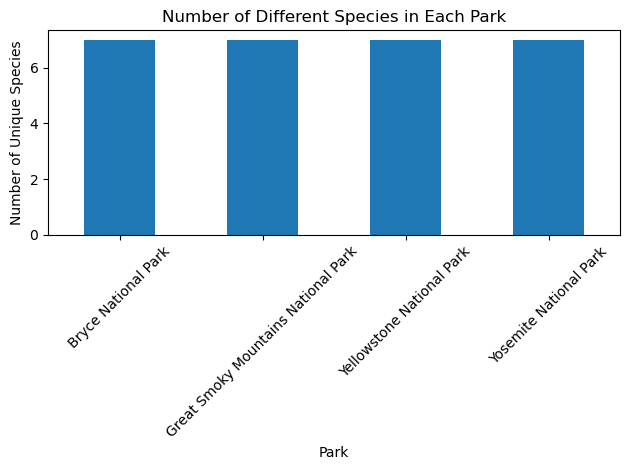

In [46]:
# First analysis
# Let's get the number of species per category in each park


import matplotlib.pyplot as plt

# Group by park and count unique species
species_count = species_observations.groupby('park_name')['category'].nunique()

# Create a bar plot
species_count.plot(kind='bar')
plt.xlabel('Park')
plt.ylabel('Number of Unique Species')
plt.title('Number of Different Species in Each Park')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


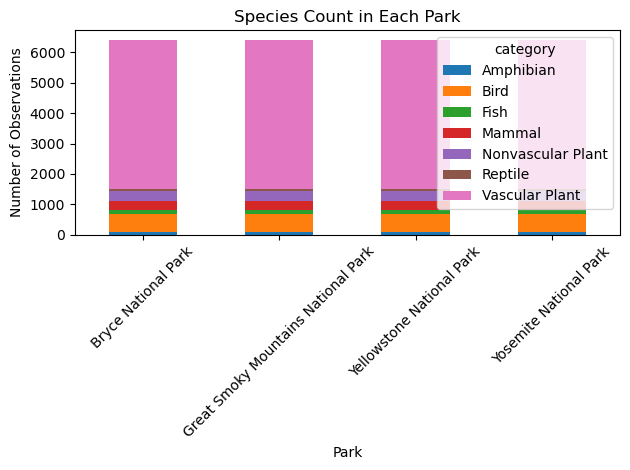

In [48]:
# Count the occurrences of each species in each park
species_counts = species_observations.groupby(['park_name', 'category']).size().unstack(fill_value=0)

# Create a stacked bar plot
species_counts.plot(kind='bar', stacked=True)
plt.xlabel('Park')
plt.ylabel('Number of Observations')
plt.title('Species Count in Each Park')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()